Aplicar Random Forest con "falldetection" en python y en R, para ver si discrepan

In [1]:
sos_path = "../../datasets/falldetection/falldetection.csv"

### Python

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
df = pd.read_csv(sos_path)

NameError: name 'sos_path' is not defined

In [3]:
N = df.shape[0]

prop_train = 2 / 3
N_train = np.ceil(N * prop_train).astype(np.int64)
N_test = N - N_train

data = df.drop(["ACTIVITY"], 1)
target = df.ACTIVITY

data_train = data.iloc[:N_train]
data_test = data.iloc[N_train:]

target_train = target[:N_train]
target_test = target[N_train:]

In [4]:
rfc = RandomForestClassifier(n_estimators = 100)

In [5]:
rfc.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
train_score = rfc.score(data_train, target_train)
test_score = rfc.score(data_test, target_test)

In [7]:
train_score, test_score

(1.0, 0.7782051282051282)

### En R

In [8]:
library(randomForest)
df = read.csv(sos_path)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [9]:
df$ACTIVITY = as.factor(df$ACTIVITY)

In [10]:
N = nrow(df)
prop_train = 2/3
N_train = ceiling(N * prop_train)
N_test = N - N_train
data_train = df[1:N_train,]
data_test = df[(N_train + 1):N,]

In [11]:
rf = randomForest(ACTIVITY ~ ., data = data_train, ntree = 100)

In [12]:
R_test_score = sum(diag(table(data_test$ACTIVITY, predict(rf, data_test)))) / nrow(data_test)
R_train_score = sum(diag(table(data_train$ACTIVITY, predict(rf, data_train)))) / nrow(data_train)

### Gráfica

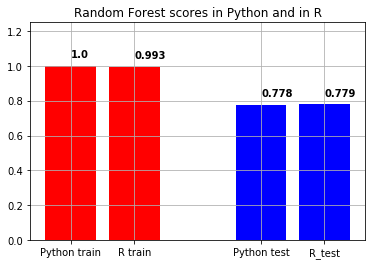

In [13]:
%get R_train_score R_test_score --from R

scores = [train_score,R_train_score, test_score,R_test_score]
labs = ["Python train", "R train", "Python test",  "R_test"]
cols = ["r","r","b","b"]
posit = [0,1,3,4]
plt.bar(x = posit,  height = scores, tick_label = labs, color = cols)
plt.grid(True)
plt.title("Random Forest scores in Python and in R")
plt.ylim(0,1.25)
for i in range(len(scores)):
    plt.text(posit[i], scores[i] + 0.05, round(scores[i],3),fontweight='bold')

### Incrementando la cantidad de árboles

In [14]:
#nt = 3:500

In [15]:
nt = seq(5,100,5)

In [16]:
df = read.csv(sos_path)
df$ACTIVITY = as.factor(df$ACTIVITY)
N = nrow(df)
prop_train = 2/3
N_train = ceiling(N * prop_train)
N_test = N - N_train
data_train = df[1:N_train,]
data_test = df[(N_train + 1):N,]
N = nrow(df)
prop_train = 2/3
N_train = ceiling(N * prop_train)
N_test = N - N_train
data_train = df[1:N_train,]
data_test = df[(N_train + 1):N,]

In [17]:
f = function(n) {
    rf = randomForest(ACTIVITY ~ ., data = data_train, ntree = n)
    R_test_score = sum(diag(table(data_test$ACTIVITY, predict(rf, data_test)))) / nrow(data_test)
    R_train_score = sum(diag(table(data_train$ACTIVITY, predict(rf, data_train)))) / nrow(data_train)
    return(list("train" = R_train_score, "test" = R_test_score))
}

In [18]:
res = sapply(nt, FUN = "f")

In [19]:
R_train_scores = res[1, 1:ncol(res)]
R_test_scores = res[2, 1:ncol(res)]

### En python

In [20]:
rfc = RandomForestClassifier()

In [21]:
%get nt --from R
python_train_scores = []
python_test_scores = []
for i in nt:
    rfc.set_params(n_estimators = i)
    rfc.fit(data_train, target_train)
    train_score = rfc.score(data_train, target_train)
    test_score = rfc.score(data_test, target_test)
    
    python_train_scores.append(train_score)
    python_test_scores.append(test_score)

In [22]:
%get R_train_scores --from R
print(R_train_scores)

[0.949917597509614, 0.97363120307636, 0.980681193920527, 0.985808459989013, 0.98681560153818, 0.98983702618568, 0.991118842702802, 0.992125984251969, 0.991210401025453, 0.992309100897272, 0.992950009155832, 0.99340780076909, 0.993041567478484, 0.992950009155832, 0.993957150704999, 0.994140267350302, 0.994872733931514, 0.994323383995605, 0.994140267350302, 0.993774034059696]


Text(0, 0.5, 'Accuracy')

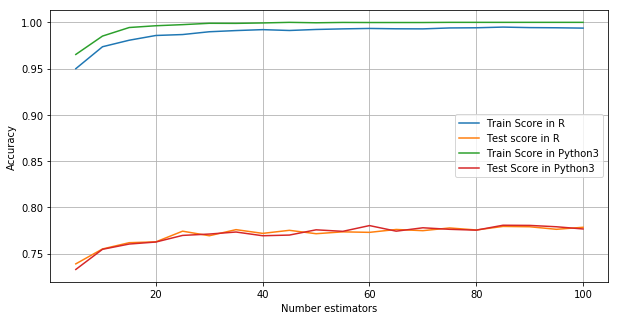

In [23]:
%get R_train_scores R_test_scores --from R
plt.figure(figsize=(10,5))
plt.plot(nt ,R_train_scores, label = "Train Score in R")
plt.plot(nt, R_test_scores, label = "Test score in R")
plt.plot(nt, python_train_scores, label = "Train Score in Python3")
plt.plot(nt, python_test_scores, label = "Test Score in Python3")
plt.grid(True)
plt.legend()
plt.xlabel("Number estimators")
plt.ylabel("Accuracy")
#plt.ylim(0.5,1.1)